In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('cleaned_healthcare.csv')
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,02-02-2024,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,07-10-2022,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,09-10-2022,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,Elizabeth Jackson,42,Female,O+,Asthma,16-08-2020,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,15-09-2020,Penicillin,Abnormal
55489,Kyle Perez,61,Female,AB-,Obesity,23-01-2020,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,01-02-2020,Aspirin,Normal
55490,Heather Wang,38,Female,B+,Hypertension,13-07-2020,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",UnitedHealthcare,27620.76,347,Urgent,10-08-2020,Ibuprofen,Abnormal
55491,Jennifer Jones,43,Male,O-,Arthritis,25-05-2019,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,321,Elective,31-05-2019,Ibuprofen,Abnormal


<Axes: >

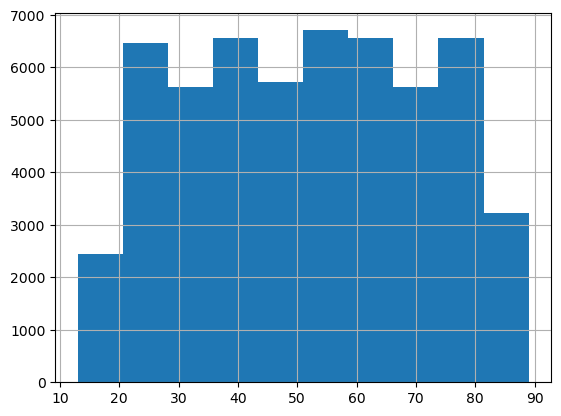

In [83]:
data['Age'].hist()

In [4]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

**What is the average age of patients, and how does it vary by gender?**

In [6]:
round(data['Age'].mean(),2)

51.54

In [8]:
data['Gender'].value_counts()

Gender
Male      27770
Female    27723
Name: count, dtype: int64

In [9]:
data.groupby('Gender')['Age'].mean()

Gender
Female    51.580276
Male      51.503421
Name: Age, dtype: float64

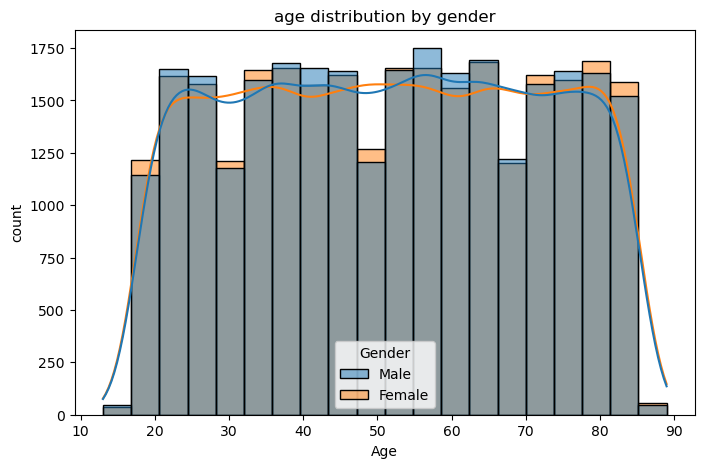

In [84]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='Age',hue='Gender',kde=True,bins=20)
plt.title("age distribution by gender")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

**AGE Distribution**

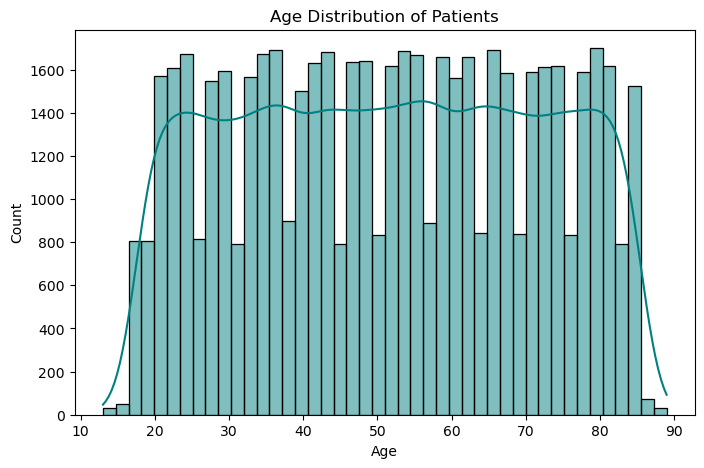

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data["Age"],kde=True, color="teal")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Gender Count**

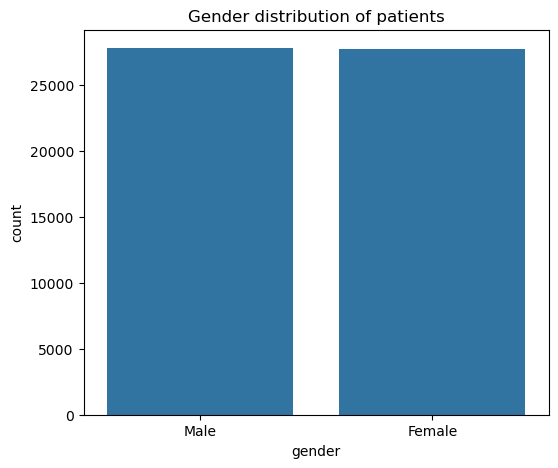

In [34]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender',data=data)
plt.title('Gender distribution of patients')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [32]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

**Frequency of blood type patients**

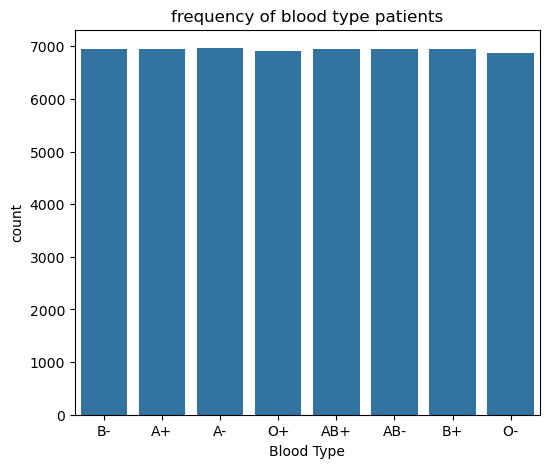

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(data=data,x='Blood Type')
plt.title("frequency of blood type patients")
plt.show()

**Distribution of Billing AMount**

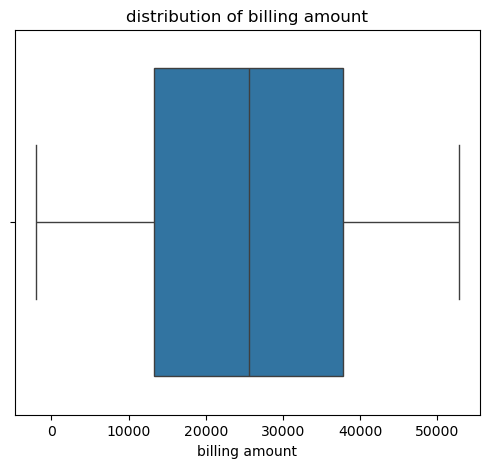

In [30]:
plt.figure(figsize=(6,5))
sns.boxplot(x=data['Billing Amount'])
plt.title("distribution of billing amount")
plt.xlabel('billing amount')
plt.show()

**Top 5 Medical Conditions – Which conditions occur most frequently?**

In [39]:
top_5=data['Medical Condition'].value_counts().head(5)
top_5

Medical Condition
Arthritis       9307
Diabetes        9304
Hypertension    9244
Obesity         9230
Cancer          9224
Name: count, dtype: int64

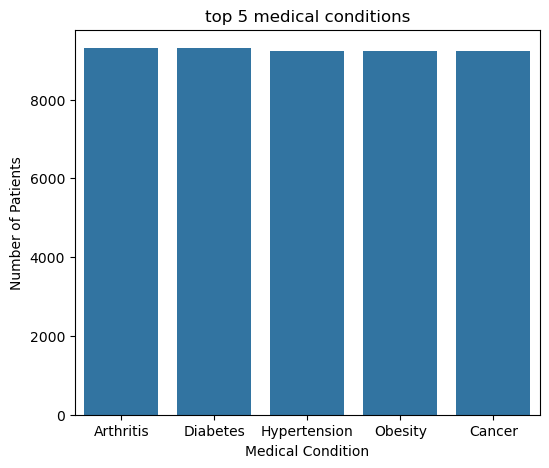

In [45]:
plt.figure(figsize=(6,5))
sns.barplot(y=top_5.values,x=top_5.index)
plt.title('top 5 medical conditions')
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")
plt.show()

In [37]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

**Age vs Billing Amount – Do older patients tend to have higher bills? (scatterplot, correlation).**

In [85]:
data['Age']=pd.to_numeric(data['Age'])
data['Billing Amount']=pd.to_numeric(data['Billing Amount'])


In [86]:
data_clean=data.dropna(subset=['Age','Billing Amount'])

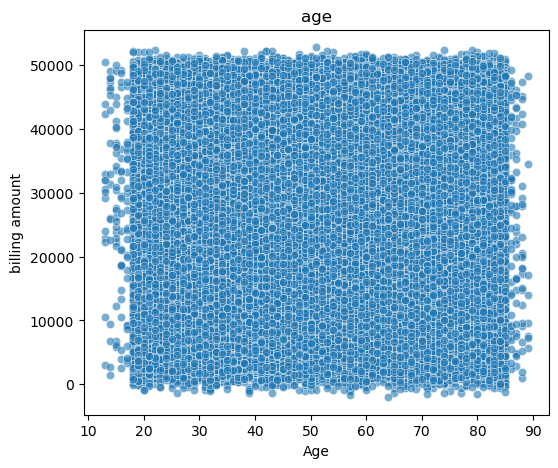

In [87]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age',y='Billing Amount',data=data_clean,alpha=0.6)
plt.title("age vs billing amount")
plt.title('age')
plt.ylabel('billing amount')
plt.show()

**Gender vs Billing Amount – Do men or women patients tend to have higher bills? (scatterplot, correlation).**

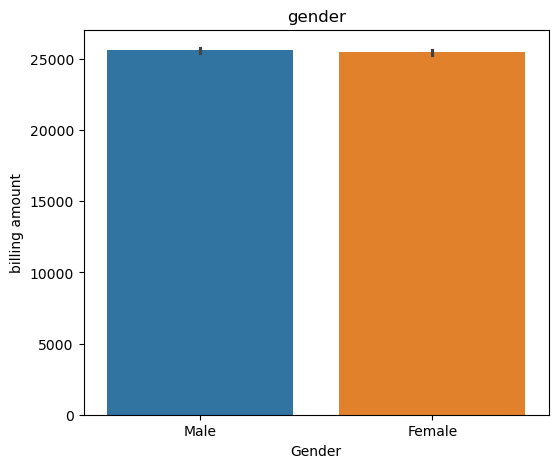

In [95]:
plt.figure(figsize=(6,5))
sns.barplot(x='Gender',y='Billing Amount',data=data,hue='Gender')
plt.title("gender vs billing amount")
plt.title('gender')
plt.ylabel('billing amount')
plt.show()

**Medical Condition vs Length of Stay – Which conditions lead to longer hospital stays?**

In [62]:
data['Date of Admission']=pd.to_datetime(data['Date of Admission'],errors='coerce')

C:\Users\Surjith S Hanji\AppData\Local\Temp\ipykernel_19524\3276189966.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date of Admission']=pd.to_datetime(data['Date of Admission'],errors='coerce')


In [63]:
data['Discharge Date']=pd.to_datetime(data['Discharge Date'],errors='coerce')

In [70]:
data['length of stay']=(data['Discharge Date']-data['Date of Admission'])

In [71]:
data['length of stay'].value_counts()

length of stay
3 days       98
1 days       90
30 days      84
-29 days     76
28 days      73
             ..
346 days      1
334 days      1
333 days      1
353 days      1
-312 days     1
Name: count, Length: 677, dtype: int64

In [79]:
avg_los=data.groupby('Medical Condition')['length of stay'].mean().sort_values(ascending=True).head(10)

In [80]:
avg_los

Medical Condition
Cancer         11 days 21:28:11.200449817
Obesity        14 days 09:56:50.062550992
Asthma                   16 days 01:36:00
Hypertension   16 days 05:31:10.324189526
Diabetes                 16 days 13:30:00
Arthritis      16 days 17:19:31.882845188
Name: length of stay, dtype: timedelta64[ns]

C:\Users\Surjith S Hanji\AppData\Local\Temp\ipykernel_19524\2082969291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_los.index, y=avg_los.values, palette="viridis")


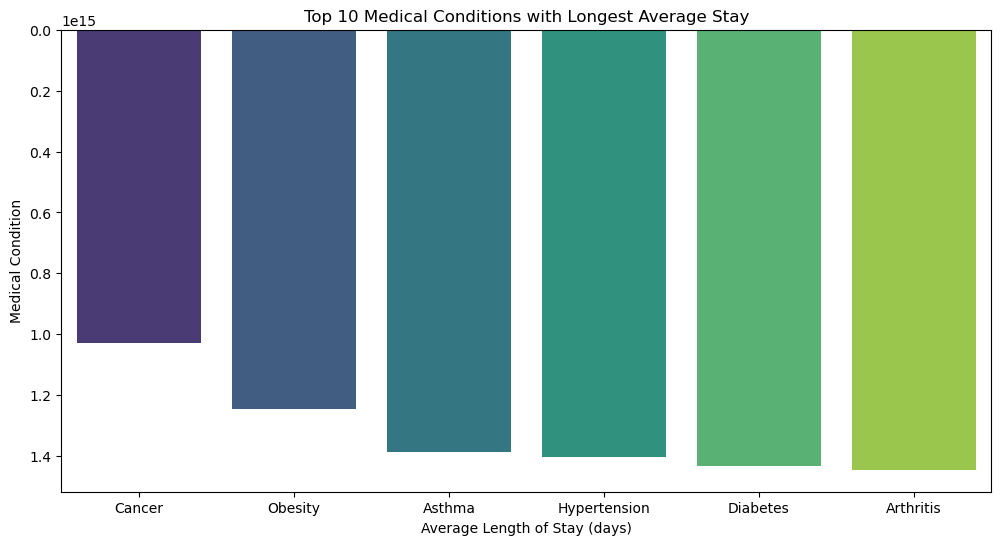

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_los.index, y=avg_los.values, palette="viridis")
plt.title("Top 10 Medical Conditions with Longest Average Stay")
plt.xlabel("Average Length of Stay (days)")
plt.ylabel("Medical Condition")
plt.show()

**Test Results vs Billing Amount – Do patients with “Positive” test results pay higher bills?**

C:\Users\Surjith S Hanji\AppData\Local\Temp\ipykernel_19524\869166736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Test Results", y="Billing Amount", data=data, palette="Set2")


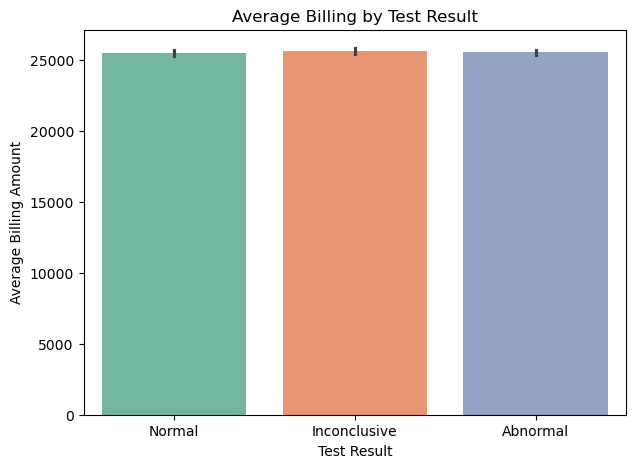

In [98]:
plt.figure(figsize=(7,5))
sns.barplot(x="Test Results", y="Billing Amount", data=data, palette="Set2")
plt.title("Average Billing by Test Result")
plt.xlabel("Test Result")
plt.ylabel("Average Billing Amount")
plt.show()

In [99]:
df_clean = df.dropna(subset=["Test Results", "Billing Amount"])
avg_billing = df_clean.groupby("Test Results")["Billing Amount"].mean().sort_values(ascending=False)
print("Average Billing Amount by Test Result:\n", avg_billing)

Average Billing Amount by Test Result:
 Test Results
Inconclusive    25622.904514
Abnormal        25539.456603
Normal          25455.421853
Name: Billing Amount, dtype: float64
